In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
header_names= ["latitude", "longitude", "temperature", "humidity", "precipitation", "windspeed", "winddirection", "cloudcover", "pressure", "dewpoint", "date", "time"]
climate_df = pd.read_csv("data/hcm_weather_processed.csv", header=0, names=header_names)
climate_df

,latitude,longitude,temperature,humidity,precipitation,windspeed,winddirection,cloudcover,pressure,dewpoint,date,time
0,10.775388,106.702825,25.6,88,0.0,5.7,145,99,1011.5,23.4,2024-01-01,00:00:00
1,10.775388,106.702825,25.3,90,0.0,3.6,143,96,1011.2,23.5,2024-01-01,01:00:00
2,10.775388,106.702825,25.3,88,0.0,0.5,135,96,1010.7,23.2,2024-01-01,02:00:00
3,10.775388,106.702825,24.9,91,0.0,4.7,9,98,1010.5,23.3,2024-01-01,03:00:00
4,10.775388,106.702825,24.6,92,0.0,8.0,352,100,1010.4,23.2,2024-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
128443,10.738544,106.729361,26.9,90,0.0,2.7,4,100,1009.5,25.1,2025-10-30,19:00:00
128444,10.738544,106.729361,27.0,89,0.2,0.6,18,97,1010.5,25.1,2025-10-30,20:00:00
128445,10.738544,106.729361,26.3,93,0.2,6.5,104,85,1011.4,25.0,2025-10-30,21:00:00
128446,10.738544,106.729361,25.6,94,0.0,6.5,32,77,1011.6,24.7,2025-10-30,22:00:00


In [3]:
location = {
    "Center": [(10.775388, 106.702825), (10.839823, 106.670396)],
    "Suburb": [(10.995955, 106.511271), (10.721314, 106.546622)],
    "Landlocked": [(10.475805, 106.865040), (10.411380, 107.136224)],
    "Industrial": [(10.904439, 106.782443), (10.738544, 106.729361)]
}

### Lượng mưa thay đổi theo mùa, theo khu vực và theo thời gian trong ngày như thế nào?

Trước hết, ta chỉ xét những dòng mưa có ý nghĩa (precipitation >= 0.1).

**1. Mùa**

Thành phố Hồ Chí Minh và các địa điểm trong dữ liệu có sự phân biệt về mùa __mưa__ và __khô__ thay vì 4 mùa như các tỉnh miền Bắc Việt Nam.  
Trên cơ sở này và các khu vực có đới khí hậu giống nhau, ta phân nhóm dữ liệu thành 2 mùa __mưa (tháng 5-10)__ và __khô (tháng 11-4)__.

In [57]:
climate_df['date'] = pd.to_datetime(climate_df['date'])
climate_df['month'] = climate_df['date'].dt.month

/tmp/ipykernel_20991/1269940048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=climate_df, x="month", y="precipitation", palette="Set2")


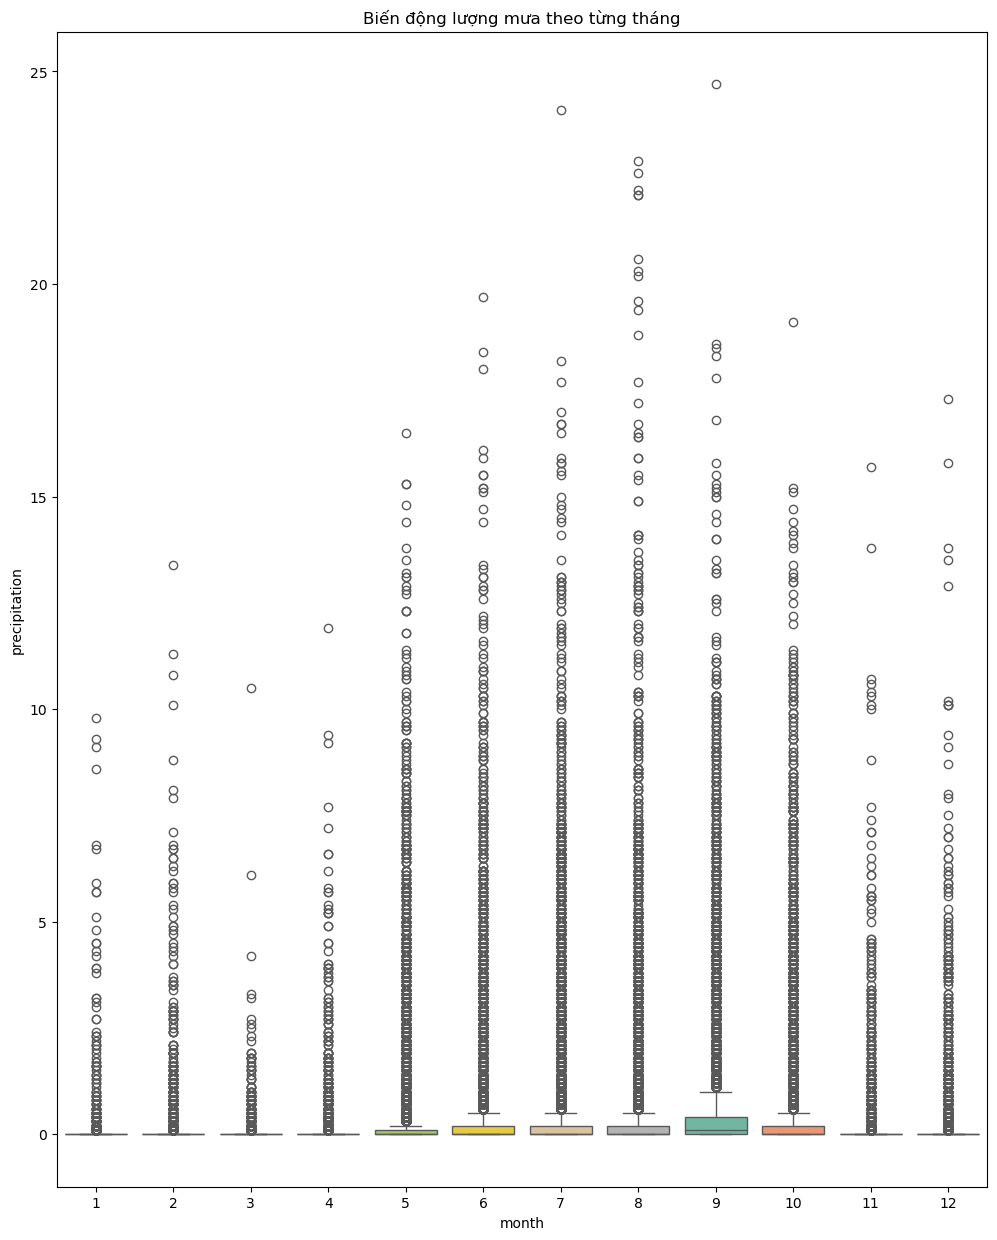

In [46]:
plt.figure(figsize=(12, 15))
sns.boxplot(data=climate_df, x="month", y="precipitation", palette="Set2")

plt.title("Biến động lượng mưa theo từng tháng")
plt.show()

Số hóa, ta quy ước `0` là mùa khô, `1` là mùa mưa.

In [59]:
climate_df['season'] = np.where((climate_df['month'] >= 5) & (climate_df['month'] <= 10), 1, 0)
rain_df = climate_df[climate_df["precipitation"] > 0]

In [56]:
season = climate_df.groupby("season")["precipitation"].describe()
season

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
0,57984.0,0.055272,0.438173,0.0,0.0,0.0,0.0,17.3
1,70464.0,0.454758,1.393928,0.0,0.0,0.0,0.2,24.7


Trung bình và lượng mưa tối đa của 2 mùa có sự chênh lệch rõ ràng. Trong đó, lượng mưa của mùa mưa chiếm 89.16% lượng mưa cả năm.

**2. Khu vực**

Ta phân khu vực theo 4 vùng (Trung tâm, Ngoại ô, Giáp biển, Khu công nghiệp) thay vì từng tỉnh.

In [66]:
location = {
    "Center": [(10.775388, 106.702825), (10.839823, 106.670396)],
    "Suburb": [(10.995955, 106.511271), (10.721314, 106.546622)],
    "Landlocked": [(10.475805, 106.865040), (10.411380, 107.136224)],
    "Industrial": [(10.904439, 106.782443), (10.738544, 106.729361)]
}
map_dict = {
    coord: area 
    for area, coords in location.items() 
    for coord in coords
}

climate_df['coordinates'] = list(zip(climate_df['latitude'], climate_df['longitude']))
climate_df['area'] = climate_df['coordinates'].map(map_dict)

In [68]:
climate_df.groupby("area")['precipitation'].describe()

,count,mean,std,min,25%,50%,75%,max
area,,,,,,,,
Center,32112.0,0.278099,1.114024,0.0,0.0,0.0,0.1,22.2
Industrial,32112.0,0.288067,1.153369,0.0,0.0,0.0,0.1,24.1
Landlocked,32112.0,0.248954,0.953914,0.0,0.0,0.0,0.1,22.6
Suburb,32112.0,0.282570,1.134157,0.0,0.0,0.0,0.1,24.7


Với cùng số lượng mẫu, lượng mưa trung bình của Trung tâm, Khu công nghiệp, Ngoại ô có chênh lệch không đáng kể.
Trong khi đó, vùng ven biển lại có lượng mưa thấp hơn nhiều.

**3. Thời điểm trong ngày**

Vì dữ liệu phân bố theo hourly, ta xét cả dataset `climate_df` (tất cả giờ).

/tmp/ipykernel_20991/3228850505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=climate_df, x="time", y="precipitation", palette="Set2")


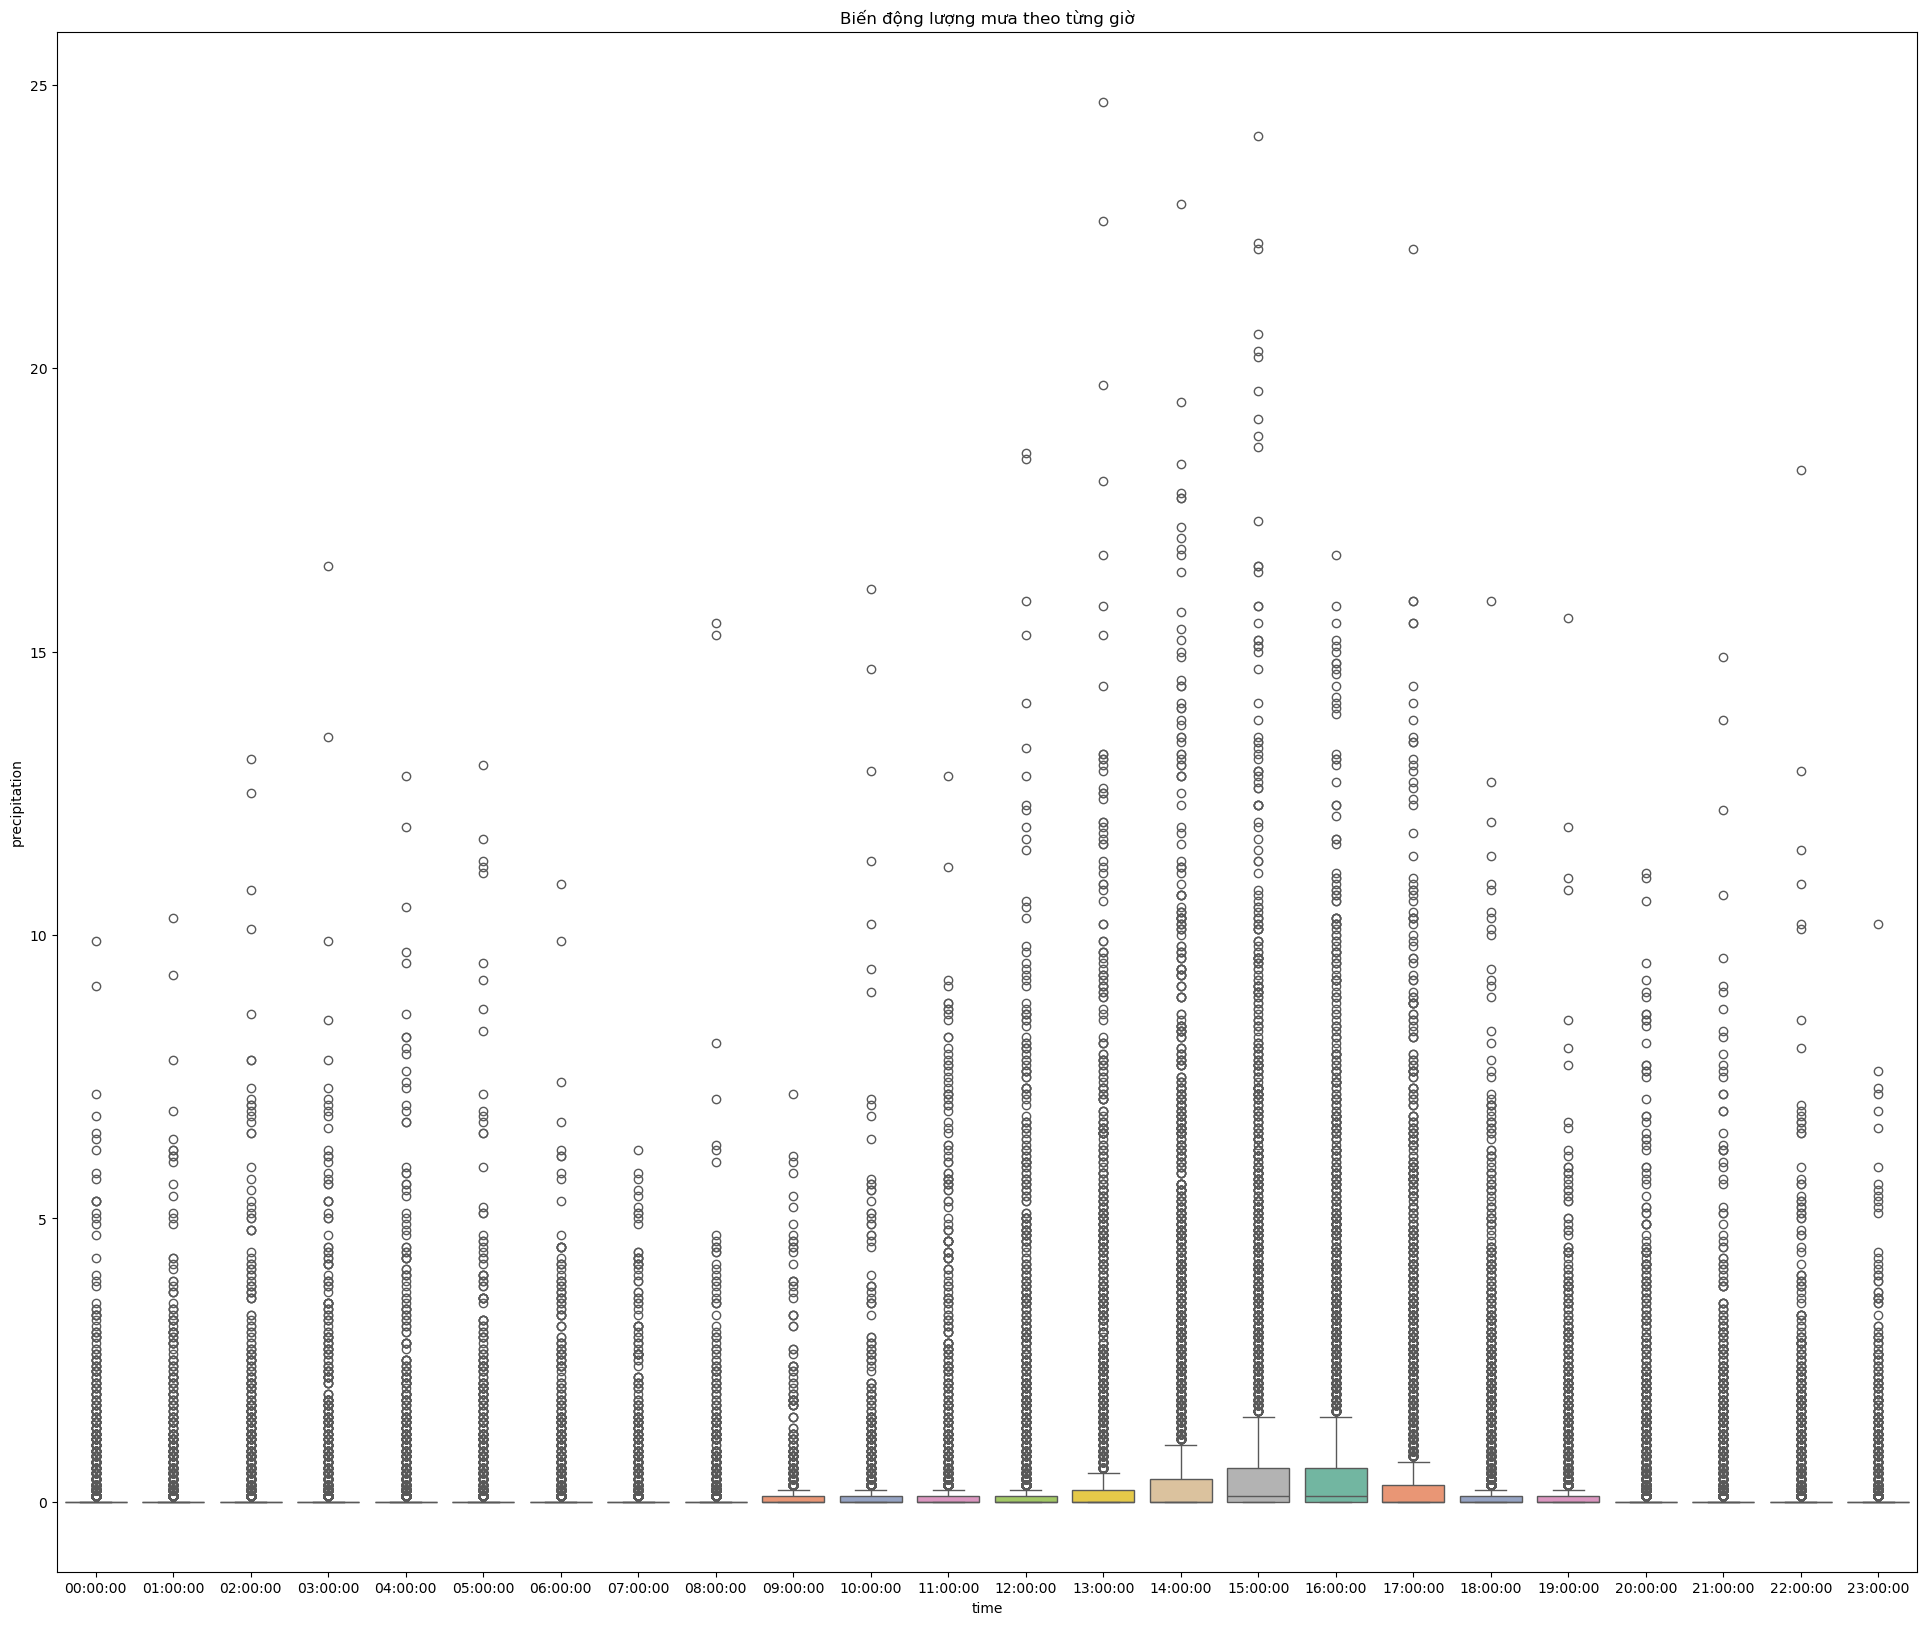

In [95]:
plt.figure(figsize=(24, 20))
sns.boxplot(data=climate_df, x="time", y="precipitation", palette="Set2")

plt.title("Biến động lượng mưa theo từng giờ")
plt.show()

Có thể thấy, lượng mưa được phân bố không đều, sáng (0-8 giờ) thường không mưa, trong khi chiều (14-17 giờ) thường có lượng mưa lớn nhất trong ngày.

##  I. Những nguyên nhân nào gây ra mưa
**1. Vị trí địa lý (tọa độ: lat, long) có ảnh hưởng đến quy luật mưa không ?**  
Xem xét có sự khác biệt rõ rệt nào giữa lượng mưa của các tọa độ, với cùng điều kiện thời tiết không ?  
-> Vì tỉ lệ khác nhau là có, nhưng sai số nhỏ, và giá trị không phải nhị phân, nên việc xem xét tọa độ là không quá cần thiết.

In [4]:
check_cols = []
for name in header_names:
    if name not in ['latitude', 'longitude', 'precipitation']:
        check_cols.append(name)
        
check_precipitation_df = climate_df.groupby(check_cols)
count = 0 
for name, group in check_precipitation_df:
    if group["precipitation"].nunique() > 1:
        count += 1
        print(name)

        long = group["longitude"].values
        lat = group["latitude"].values
        prec = group["precipitation"].values
        for i in range(len(long)):
            print(f"({lat[i]}, {long[i]}): {prec[i]}")
        print()

print(f"\n{count*100/len(check_precipitation_df)}%")

(25.1, 94, 9.3, 216, 100, 1008.7, 24.0, '2024-09-21', '23:00:00')
(10.775388, 106.702825): 2.6
(10.738544, 106.729361): 3.6

(25.3, 93, 8.8, 215, 100, 1008.4, 24.0, '2024-09-21', '21:00:00')
(10.775388, 106.702825): 3.2
(10.738544, 106.729361): 3.5

(25.3, 95, 7.5, 235, 100, 1009.6, 24.5, '2024-07-20', '22:00:00')
(10.839823, 106.670396): 0.6
(10.995955, 106.511271): 0.9

(25.9, 94, 0.2, 90, 100, 1008.1, 24.8, '2025-09-21', '19:00:00')
(10.775388, 106.702825): 0.2
(10.738544, 106.729361): 0.1


0.003114343107180118%


**2. Có giá trị nào tuyến tính với lượng mưa không ?**  
Nếu có, đây sẽ là nhân tố quan trọng trong việc quyết định lượng mưa.  
-> Khi lượng mưa tăng dần, không có yếu tố nào tuyến tính theo, nên không có yếu tố nào độc lập ảnh hưởng đến lượng mưa.  
(Điều này đúng với lý thuyết tính kết nối của thời tiết)

In [5]:
df_sorted_descending = climate_df[climate_df["precipitation"] > 0.0].sort_values(by="precipitation", ascending=False)
for col in df_sorted_descending:
    print(f"{col}:\t{df_sorted_descending[col].is_monotonic_decreasing}")

latitude:	False
longitude:	False
temperature:	False
humidity:	False
precipitation:	True
windspeed:	False
winddirection:	False
cloudcover:	False
pressure:	False
dewpoint:	False
date:	False
time:	False


**3. Điểm chung của những thời điểm mưa/không mưa là gì ?**
